# HW 6
Author: Luis Perez

Last Updated: Aug. 2nd, 2019

In [11]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy import linalg
import seaborn as sns

## Problem 1: Optimal operation of a two-state chemical reactor
### Part (b)

In [112]:
def loadProblem1Data():
    n = 3
    T = 1
    k = 2
    A1 = 5 * np.array([
        [-0.5, +0.0, +0.0],
        [+0.2, +0.0, -0.1],
        [+0.3, +0.0, +0.1]
    ])
    A2 = 5 * np.array([
        [+0.0, +0.1, +0.2],
        [+0.0, -0.1, +0.3],
        [+0.0, +0.0, -0.5]
    ])
    x0 = np.array([[1], [0], [0]])
    
    return A1, A2, x0, n, T, k

In [139]:
def solveProblem1b():
    A1, A2, x0, n, T, k = loadProblem1Data()
    kIndex = k - 1
    T0s = np.arange(0, T, step=0.001)
    Cks = []
    for T0 in T0s:
        state = np.dot(linalg.expm((T - T0) * A2), np.dot(linalg.expm(T0 * A1), x0))
        Ck = state[kIndex]
        Cks.append(Ck)
    maxIndex = np.argmax(Cks)
    optimalT0 = T0s[maxIndex]
    maxChemical = Cks[maxIndex]
    print("The optimal value is $T_0 = %.2f$ with $%.2f$ units of compound %d at time $T = %d$." % (optimalT0, maxChemical,k,T))
    
    # Use optimal T0 to to plot results.
    states = []
    for t in np.arange(0, T, step=0.001):
        state = np.dot(linalg.expm(max((t - optimalT0),0) * A2), np.dot(linalg.expm(min(t,optimalT0) * A1), x0))
        states.append(state)
    series = np.concatenate(states, axis=1)
    for i in range(series.shape[0]):
        plt.plot(T0s, series[i, :], label='Compound %s' %(i + 1))
    plt.legend(loc='upper left')
    plt.title("Chemical Reactor Concentrations for optimal T0")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.savefig('chemical_reactor_b')

The optimal value is $T_0 = 0.61$ with $0.37$ units of compound 2 at time $T = 1$.


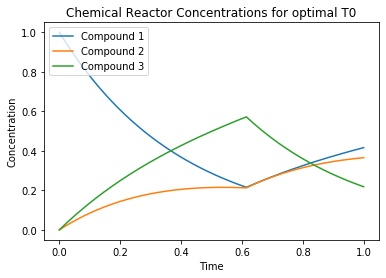

In [140]:
solveProblem1b()

In [150]:
def solveProblem1d():
    A1, A2, x0, n, T, k = loadProblem1Data()
    kIndex = k - 1
    
    T1s = np.arange(0, T, step=0.0025)
    Cks = []
    i = 0
    for T1 in T1s:
        T2s = np.arange(T1, T, step=0.0025)
        for T2 in T2s:
            state = np.dot(linalg.expm((T - T2) * A1), np.dot(linalg.expm((T2-T1) * A2), np.dot(linalg.expm((T1 * A1)),x0)))
            Ck = state[kIndex]
            Cks.append((Ck, (T1, T2)))
        i += 1
        if i % 30 == 0:
            print("Finished outer loop. %s%% done" % (T1 * 100))
    maxChemical, (optT1, optT2) = max(Cks)
    print("The optimal value is $T_1 = %.2f$ and $T_2 = %.2f$ with $%.2f$ units of compound %d at time $T = %d$." % (optT1, optT2, maxChemical,k,T))

    # Use optimal T1, T2 to to plot results.
    states = []
    for t in np.arange(0, T, step=0.0025):
        state = np.dot(linalg.expm(max((t - optT2),0) * A1), np.dot(linalg.expm(min(optT2-optT1, max(t - optT1, 0)) * A2), np.dot(linalg.expm((min(optT1, t) * A1)),x0)))
        states.append(state)
    
    # Each row is the timeseries for a chemical compounds.
    results = np.concatenate(states, axis=1)
    for i in range(results.shape[0]):
        plt.plot(T1s, results[i, :].flatten(), label='Compound %s' %(i + 1))
    plt.legend(loc='upper left')
    plt.title("Chemical Reactor Concentrations for optimal T1, T2")
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.savefig('chemical_reactor_d')

Finished outer loop. 7.249999999999999% done
Finished outer loop. 14.75% done
Finished outer loop. 22.25% done
Finished outer loop. 29.75% done
Finished outer loop. 37.25% done
Finished outer loop. 44.75% done
Finished outer loop. 52.25% done
Finished outer loop. 59.75% done
Finished outer loop. 67.25% done
Finished outer loop. 74.75% done
Finished outer loop. 82.25% done
Finished outer loop. 89.75% done
Finished outer loop. 97.25% done
The optimal value is $T_1 = 0.49$ and $T_2 = 0.87$ with $0.38$ units of compound 2 at time $T = 1$.


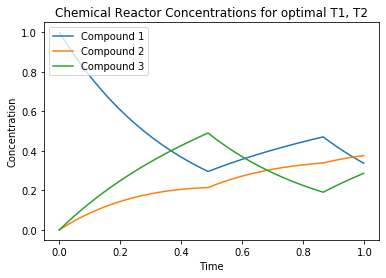

In [151]:
solveProblem1d()

## Problem 2
### Part (b)

In [25]:
def vectorAtPoint(X,Y, w=0.1):
    """Returns the \dot{x}"""
    A = np.array([
        [0, w],
        [-w, 0]
    ])
    dX = np.zeros(X.shape)
    dY = np.zeros(Y.shape)
    n,m = X.shape
    for i in range(n):
        for j in range(m):
            x = X[i,j]
            y = Y[i,j]
            dx, dy = np.dot(A, [x,y])
            dX[i,j] = dx
            dY[i,j] = dy
    return dX, dY

# Grid of x, y points
nx, ny = 20, 20
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)
dX, dY = vectorAtPoint(X,Y)

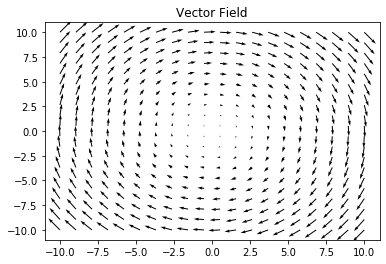

In [32]:
ax = plt.quiver(X,Y, dX, dY)
plt.title("Vector Field")
plt.savefig("vector_field_example")

## Problem 4: Analysis of investment allocation strategies
### Part (b)

In [107]:
def getProblem4Matrices():
    stateChange = np.array([
        [0] * 6,
        [0] * 6,
        [0] * 6,
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
    ])
    payoff = np.array([
        [1.05, 0.06, 0.07, 1.06, 0.07, 1.07]
    ])
    y1 = np.array([
        [0.35],
        [0.35],
        [0.3],
        [0],
        [0],
        [0]
    ])
    y2 = np.array([
        [0.6],
        [0.2],
        [0.2],
        [0],
        [0],
        [0]
    ])
    A1 = np.dot(y1, payoff) + stateChange
    A2 = np.dot(y2, payoff) + stateChange
    return A1, A2, y1, y2
def solveProblem4():
    # A1 is 35-35-30, A2 is 60-20-20.
    A1, A2, x01, x02 =  getProblem4Matrices()
    # get eigenvalues of A1.
    vals1, left1, right1 = linalg.eig(A1, left=True, right=True)
    # Assert we're getting what we think.
    assert np.linalg.matrix_rank(left1) == 6
    vals2, left2, right2 = linalg.eig(A2, left=True, right=True)
    # Turns out that this one is not diaginazeble.
    # However, the eignevalues with multiplicity are 0, so
    # they end up dying away in the limit regardless, so it's safe
    # to ignore. See homework for more details.
    assert np.linalg.matrix_rank(left2) == 4
    with np.printoptions(formatter={'complexfloat': '{: .8f}'.format}):
        print("Eigenvalues for 35-35-30")
        print(vals1)
        print("Eignevalue for 60-20-20")
        print(vals2)
    
    print("The wealth ratio for 35-35-30 strategy is %0.8f" % (np.real(vals1[0])))
    print("The wealth ratio for 60-20-20 strategy is %0.8f" % (np.real(vals2[0])))
    
    # Now compute the liquidity ratios.
    prod1 = np.dot(left1[:,0].T, x01) * right1[:,0]
    prod2 = np.dot(left2[:,0].T, x02) * right2[:,0]
    
    for i, state in enumerate([prod1, prod2]):
        den = np.sum(state)
        L1 =  (state[0] + state[3] + state[5]) / den
        L2 = (state[1] + state[4]) / den
        L3 = state[2] / den
        print("The liquidity ratios for %s strategy are:" % (
            "35-35-30" if i % 2 == 0 else "60-20-20"))
        print("""
\\begin{align*}
    L_1 &= %s \\\
    L_2 &= %s \\\\
    L_3 &= %s 
\\end{align*}
        """ % (L1, L2, L3))
    print("Better initial allocation for 35-35-30 is %s" % (
        right1[:3,0]/ np.linalg.norm(right1[:3,0])))
    print("Better initial allocation for 60-20-20 is %s" % (
        right2[:3,0]/ np.linalg.norm(right2[:3,1])))
    
    

In [108]:
solveProblem4()

4
8.132241926763072
Eigenvalues for 35-35-30
[ 1.06265258+0.00000000j -0.32657629+0.44206583j -0.32657629-0.44206583j
  0.00000000+0.00000000j -0.00000000+0.00000000j -0.00000000-0.00000000j]
Eignevalue for 60-20-20
[ 1.05978649+0.00000000j -0.20189324+0.40145558j -0.20189324-0.40145558j
  0.00000000+0.00000000j  0.00000000+0.00000000j  0.00000000+0.00000000j]
The wealth ratio for 35-35-30 strategy is 1.06265258
The wealth ratio for 60-20-20 strategy is 1.05978649
The liquidity ratios for 35-35-30 strategy are:

\begin{align*}
    L_1 &= (0.5033876854426759-0j) \    L_2 &= (0.33681212927259585-0j) \\
    L_3 &= (0.15980018528472825-0j) 
\end{align*}
        
The liquidity ratios for 60-20-20 strategy are:

\begin{align*}
    L_1 &= (0.6215267348660467+0j) \    L_2 &= (0.24989770184766186+0j) \\
    L_3 &= (0.12857556328629144+0j) 
\end{align*}
        
Better initial allocation for 35-35-30 is [-0.6047079 +0.j -0.6047079 +0.j -0.51832106+0.j]
Better initial allocation for 60-20-20 is [

## Problem 6: Optimal espresso cup pre-heating

In [65]:
def solveProblem6():
    # data for espresso problem.
    n = 10
    # ambient temperature.
    Ta = 20
    # temperature of preheat liquid.
    Tl = 100
    # temperature of espresso.
    Te = 95
    A = np.array([
     [-1.00,   1.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
     [33.33, -44.44,  11.11,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
      [0.00,  11.11, -22.22,  11.11,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
      [0.00,   0.00,  11.11, -22.22,  11.11,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00],
      [0.00,   0.00,   0.00,  11.11, -22.22,  11.11,   0.00,   0.00,   0.00,   0.00,   0.00],
      [0.00,   0.00,   0.00,   0.00,  11.11, -22.22,  11.11,   0.00,   0.00,  0.00,  0.00],
      [0.00,   0.00,   0.00,   0.00,   0.00,  11.11, -22.22,  11.11,   0.00,   0.00,   0.00],
      [0.00,   0.00,   0.00,   0.00,   0.00,   0.00,  11.11, -22.22,  11.11,   0.00,   0.00],
      [0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,  11.11, -22.22,  11.11,   0.00],
      [0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,  11.11, -22.22,  11.11],
      [0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,   0.00,  11.11, -11.31]
    ])
    Ps = np.linspace(0, 60, 1000)
    expPs = [linalg.expm(p * A) for p in Ps]
    x0 = np.array([[Tl]] + [[Ta] for _ in range(n)])
    Ts = []
    for P in Ps:
        xP = np.dot(linalg.expm(P * A), x0 - Ta) + Ta
        xhatP = xP
        xhatP[0] = Te
        final = np.dot(linalg.expm(15 * A), xhatP - Ta) + Ta
        Ts.append(final[0])
        
    # Find the index of the maximu.
    maxIndex = np.argmax(Ts)
    optimalExpressoTemp = Ts[maxIndex]
    optimalP = Ps[maxIndex]
    print("The optimal value of $P$ is $P = %.2f$s which gives an espresso temperature at consumption of $%.2f$C." % (optimalP, optimalExpressoTemp))


In [151]:
solveProblem6()

The optimal value of $P$ is $P = 11.11$s which gives an espresso temperature at consumption of $87.60$C.


## Problem 7: Real modal form.

In [114]:
def drawMatrixWithComplexEigenvalues(n=10):
    while True:
        A = np.random.normal(size=(n, n))
        Lam, T = np.linalg.eig(A)
        if np.any(np.iscomplex(T)):
            return A, Lam, T
def solveProblem7():
    n = 10
    A, Lam, T = drawMatrixWithComplexEigenvalues(n)
    print("The generated A matrix is:")
    with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
        print(A)

    # Complex eigvalues always come in pairs.
    complexMask = np.iscomplex(Lam)
    complexVectors = T[:, complexMask]
    assert complexVectors.shape[1] % 2 == 0
    complexVectors = complexVectors[:, ::2]
    realVectors = np.real(T[:, ~complexMask])
    r = realVectors.shape[1]
    assert r + 2*complexVectors.shape[1] == n
    realPart = np.real(complexVectors)
    imgPart = np.imag(complexVectors)
    S = np.zeros((n, n))
    S[:, :r] = realVectors
    S[:, r::2] = realPart
    S[:, (r+1)::2] = imgPart
    
    print("The computed S matrix is:")
    with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
        print(S)
        
    modal = np.dot(np.linalg.inv(S), np.dot(A, S))
    print("The modal form is:")
    with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
        print(modal)

In [115]:
solveProblem7()

The generated A matrix is:
[[-0.209  0.639  0.770 -0.869 -0.582  0.167  1.028  0.498 -0.218 -0.855]
 [ 0.142 -0.248  1.388 -1.709 -0.387 -0.611  0.056 -0.744 -1.097  1.216]
 [ 1.374 -1.703 -0.722 -1.689  0.050 -1.148 -0.692  0.376 -1.407  0.833]
 [-1.162  0.175  0.770  1.015 -0.059  0.310 -1.232 -1.083 -1.458  0.270]
 [ 0.357  1.636  0.781  1.166 -0.860  0.501 -0.231  1.236  0.508 -0.820]
 [-0.660  2.446  0.262  0.818  0.445 -2.100  2.153  0.185  0.460 -2.443]
 [ 0.647 -0.648  0.316 -2.137  1.702  0.906 -1.331 -0.091  0.418  1.338]
 [-0.126 -1.351  0.578 -0.579 -1.317 -0.232 -0.932 -1.458  0.016  1.801]
 [-0.739 -1.629  0.564  0.511 -0.439  0.083  0.999 -0.324 -1.941 -0.155]
 [ 0.103 -0.433  2.194  0.675  1.089 -0.012 -1.236  0.276 -0.552 -0.855]]
The computed S matrix is:
[[ 0.527  0.193  0.680 -0.579  0.075  0.187 -0.162 -0.120  0.301  0.141]
 [ 0.327  0.057  0.003 -0.168 -0.149  0.251 -0.054 -0.427  0.084 -0.012]
 [-0.008 -0.251  0.050  0.075 -0.411 -0.151  0.317 -0.081 -0.197  0.14